<a href="https://colab.research.google.com/github/kluless13/paper/blob/main/yolo_nas_COTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Sep 17 13:01:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Installing YOLO-NAS

In [2]:
!pip install super_gradients
!pip install roboflow
!pip install supervision

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.4/6.4 MB 53.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 135.8/135.8 kB 17.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 684.5/684.5 kB 52.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.9/2.9 MB 70.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.8/2.8 MB 110.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 408.6/408.6 kB 44.2 MB/s eta 0:00:00
     ‚îÅ‚î

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58.7/58.7 kB 1.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 155.3/155.3 kB 5.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 178.7/178.7 kB 21.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.1/49.1 MB 37.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [2]:
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
%cd {HOME}

from roboflow import Roboflow
# Roboflow API

/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Google-Images-2 in yolov5pytorch:: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6714/6714 [00:00<00:00, 8993.21it/s] 


In [5]:
LOCATION = dataset.location
print("location:", LOCATION)
CLASSES = sorted(project.classes.keys())
print("classes:", CLASSES)

location: /content/Google-Images-2
classes: ['COTs']


### Fine Tuning

In [7]:
MODEL_ARCH = 'yolo_nas_l'
BATCH_SIZE = 8
MAX_EPOCHS = 25
CHECKPOINT_DIR = f'{HOME}/checkpoints'
EXPERIMENT_NAME = project.name.lower().replace(" ", "_")

In [8]:
from super_gradients.training import Trainer

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)

[2023-09-17 13:03:20] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-09-17 13:03:20] WARNING - __init__.py - Failed to import pytorch_quantization


The console stream is logged into /root/sg_logs/console.log


[2023-09-17 13:03:25] INFO - utils.py - NumExpr defaulting to 8 threads.
Setuptools is replacing distutils.
[2023-09-17 13:03:27] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-09-17 13:03:27] WARNING - export.py - Failed to import pytorch_quantization
[2023-09-17 13:03:27] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [9]:
dataset_params = {
    'data_dir': LOCATION,
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': CLASSES
}

In [10]:
from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train, coco_detection_yolo_format_val)

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

[2023-09-17 13:04:05] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3072/3072 [00:00<00:00, 6368.69it/s]
[2023-09-17 13:04:05] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 227/227 [00:00<00:00, 6481.77it/s]
[2023-09-17 13:04:05] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 52/52 [00:00<00:00, 5023.81it/s]


In [11]:
train_data.dataset.transforms # Inspecting dataset

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

### Instantiate the model

In [12]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
)

[2023-09-17 13:04:18] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 256M/256M [00:03<00:00, 72.5MB/s]
[2023-09-17 13:04:23] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


#### Defining the metrics and training parameters

In [13]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [ ]:
!tensorboard dev upload \
  --logdir {CHECKPOINT_DIR}/{EXPERIMENT_NAME} \
  --name "yolo NAS LF" \
  --description "yolo NAS metrics" \
  --one_shot

### Training the model

In [14]:
trainer.train(
    model=model,
    training_params=train_params,
    train_loader=train_data,
    valid_loader=val_data
)

The console stream is now moved to /content/checkpoints/google_images/console_Sep17_13_04_56.txt


[2023-09-17 13:04:57] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
[2023-09-17 13:04:58] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 1812       (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_size)
    - Effective Batch size:         8          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         226        (len(train_loader))
    - Gradient updates per epoch:   226        (len(train_loader) / batch_accumulate)

[2023-09-17 13:04:58] INFO - sg_trainer.py - Started training for 25 epochs (0/24)

Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.70it/s]
[2023-09-17 13:07:21] INFO 

SUMMARY OF EPOCH 0
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 2.0147
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2984
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.8893
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 3.7054
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.9097
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2806
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 2.0696
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 3.6462
    ‚îú‚îÄ‚îÄ Precision@0.50 = 0.0
    ‚îú‚îÄ‚îÄ Recall@0.50 = 0.0
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.0152
    ‚îî‚îÄ‚îÄ F1@0.50 = 0.0



Validating epoch 1: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.62it/s]
[2023-09-17 13:09:41] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:09:41] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5026726126670837


SUMMARY OF EPOCH 1
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.2969
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 2.0147 (‚Üò -0.7178)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 2.0147 (‚Üò -0.7178)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2697
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2984 (‚Üò -0.0288)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2984 (‚Üò -0.0288)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.7501
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.8893 (‚Üò -0.1392)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.8893 (‚Üò -0.1392)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.8462
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 3.7054 (‚Üò -0.8593)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 3.7054 (‚Üò -0.8593)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.3319
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.9097 (‚Üò -0.5778)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.9097 (‚Üò -0.5778)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2211
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2806 (‚Üò -0.0596)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best u

Validating epoch 2: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.61it/s]
[2023-09-17 13:12:04] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:12:04] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6515843868255615


SUMMARY OF EPOCH 2
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.2447
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.2969 (‚Üò -0.0522)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.2969 (‚Üò -0.0522)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2586
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2697 (‚Üò -0.0111)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2697 (‚Üò -0.0111)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.6973
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.7501 (‚Üò -0.0529)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.7501 (‚Üò -0.0529)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.7399
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.8462 (‚Üò -0.1063)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.8462 (‚Üò -0.1063)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.228
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.3319 (‚Üò -0.1039)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.3319 (‚Üò -0.1039)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2137
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2211 (‚Üò -0.0074)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best un

Validating epoch 3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.60it/s]


SUMMARY OF EPOCH 3
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.2378
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.2447 (‚Üò -0.0069)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.2447 (‚Üò -0.0069)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2508
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2586 (‚Üò -0.0078)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2586 (‚Üò -0.0078)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.6702
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.6973 (‚Üò -0.027)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.6973 (‚Üò -0.027)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.7
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.7399 (‚Üò -0.0399)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.7399 (‚Üò -0.0399)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.385
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.228  (‚Üó 0.157)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.228  (‚Üó 0.157)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2135
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2137 (‚Üò -0.0002)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now =

Validating epoch 4: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.61it/s]
[2023-09-17 13:16:51] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:16:51] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7098568677902222


SUMMARY OF EPOCH 4
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.2118
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.2378 (‚Üò -0.026)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.2378 (‚Üò -0.026)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2447
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2508 (‚Üò -0.0061)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2508 (‚Üò -0.0061)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.6518
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.6702 (‚Üò -0.0185)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.6702 (‚Üò -0.0185)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.6495
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.7    (‚Üò -0.0505)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.7    (‚Üò -0.0505)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.2056
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.385  (‚Üò -0.1794)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.228  (‚Üò -0.0224)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2066
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2135 (‚Üò -0.0069)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unt

Validating epoch 5: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.60it/s]


SUMMARY OF EPOCH 5
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.1881
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.2118 (‚Üò -0.0237)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.2118 (‚Üò -0.0237)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2333
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2447 (‚Üò -0.0115)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2447 (‚Üò -0.0115)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.5883
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.6518 (‚Üò -0.0635)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.6518 (‚Üò -0.0635)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.5654
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.6495 (‚Üò -0.0841)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.6495 (‚Üò -0.0841)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.2979
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.2056 (‚Üó 0.0923)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.2056 (‚Üó 0.0923)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2288
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2066 (‚Üó 0.0222)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unti

Validating epoch 6: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.60it/s]


SUMMARY OF EPOCH 6
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.1688
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.1881 (‚Üò -0.0193)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.1881 (‚Üò -0.0193)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2315
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2333 (‚Üò -0.0017)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2333 (‚Üò -0.0017)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.5755
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.5883 (‚Üò -0.0128)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.5883 (‚Üò -0.0128)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.5354
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.5654 (‚Üò -0.0301)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.5654 (‚Üò -0.0301)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.292
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.2979 (‚Üò -0.006)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.2056 (‚Üó 0.0863)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2159
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2288 (‚Üò -0.0129)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unti

Validating epoch 7: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.57it/s]
[2023-09-17 13:24:09] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:24:09] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7110527157783508


SUMMARY OF EPOCH 7
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.1562
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.1688 (‚Üò -0.0126)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.1688 (‚Üò -0.0126)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2287
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2315 (‚Üò -0.0028)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2315 (‚Üò -0.0028)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.5702
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.5755 (‚Üò -0.0053)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.5755 (‚Üò -0.0053)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.513
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.5354 (‚Üò -0.0224)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.5354 (‚Üò -0.0224)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.1206
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.292  (‚Üò -0.1713)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.2056 (‚Üò -0.085)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2157
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2159 (‚Üò -0.0003)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unt

Validating epoch 8: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.58it/s]
[2023-09-17 13:26:39] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:26:39] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8159358501434326


SUMMARY OF EPOCH 8
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.127
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.1562 (‚Üò -0.0292)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.1562 (‚Üò -0.0292)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2255
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2287 (‚Üò -0.0032)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2287 (‚Üò -0.0032)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.5366
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.5702 (‚Üò -0.0336)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.5702 (‚Üò -0.0336)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.4589
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.513  (‚Üò -0.0541)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.513  (‚Üò -0.0541)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0213
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.1206 (‚Üò -0.0993)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.1206 (‚Üò -0.0993)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2079
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2157 (‚Üò -0.0078)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best un

Validating epoch 9: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.57it/s]


SUMMARY OF EPOCH 9
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.1206
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.127  (‚Üò -0.0064)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.127  (‚Üò -0.0064)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2239
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2255 (‚Üò -0.0015)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2255 (‚Üò -0.0015)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.5219
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.5366 (‚Üò -0.0147)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.5366 (‚Üò -0.0147)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.4414
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.4589 (‚Üò -0.0176)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.4589 (‚Üò -0.0176)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0549
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0213 (‚Üó 0.0336)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0213 (‚Üó 0.0336)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2104
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2079 (‚Üó 0.0025)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unti

Validating epoch 10: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.56it/s]


SUMMARY OF EPOCH 10
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.121
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.1206 (‚Üó 0.0004)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.1206 (‚Üó 0.0004)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2207
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2239 (‚Üò -0.0032)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2239 (‚Üò -0.0032)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.512
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.5219 (‚Üò -0.0099)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.5219 (‚Üò -0.0099)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.4289
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.4414 (‚Üò -0.0125)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.4414 (‚Üò -0.0125)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0135
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0549 (‚Üò -0.0414)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0213 (‚Üò -0.0078)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.215
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2104 (‚Üó 0.0046)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until 

Validating epoch 11: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.56it/s]


SUMMARY OF EPOCH 11
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.1041
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.121  (‚Üò -0.0169)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.1206 (‚Üò -0.0165)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2167
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2207 (‚Üò -0.004)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2207 (‚Üò -0.004)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.4875
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.512  (‚Üò -0.0245)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.512  (‚Üò -0.0245)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.3897
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.4289 (‚Üò -0.0392)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.4289 (‚Üò -0.0392)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.1796
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0135 (‚Üó 0.1661)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0135 (‚Üó 0.1661)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2306
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.215  (‚Üó 0.0156)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until

Validating epoch 12: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.58it/s]


SUMMARY OF EPOCH 12
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.1003
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.1041 (‚Üò -0.0038)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.1041 (‚Üò -0.0038)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2184
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2167 (‚Üó 0.0017)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2167 (‚Üó 0.0017)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.4867
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.4875 (‚Üò -0.0009)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.4875 (‚Üò -0.0009)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.3896
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.3897 (‚Üò -0.0)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.3897 (‚Üò -0.0)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0606
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.1796 (‚Üò -0.119)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0135 (‚Üó 0.047)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2124
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2306 (‚Üò -0.0182)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now =

Validating epoch 13: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.58it/s]


SUMMARY OF EPOCH 13
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0874
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.1003 (‚Üò -0.0129)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.1003 (‚Üò -0.0129)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2165
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2184 (‚Üò -0.0019)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2167 (‚Üò -0.0002)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.4866
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.4867 (‚Üò -0.0)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.4867 (‚Üò -0.0)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.372
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.3896 (‚Üò -0.0176)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.3896 (‚Üò -0.0176)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9452
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0606 (‚Üò -0.1154)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0135 (‚Üò -0.0683)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2285
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2124 (‚Üó 0.016)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now

Validating epoch 14: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.58it/s]


SUMMARY OF EPOCH 14
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0853
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0874 (‚Üò -0.0021)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0874 (‚Üò -0.0021)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2126
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2165 (‚Üò -0.0039)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2165 (‚Üò -0.0039)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.4708
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.4866 (‚Üò -0.0158)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.4866 (‚Üò -0.0158)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.3521
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.372  (‚Üò -0.0199)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.372  (‚Üò -0.0199)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.053
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9452 (‚Üó 0.1077)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.9452 (‚Üó 0.1077)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2173
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2285 (‚Üò -0.0112)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unt

Validating epoch 15: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.58it/s]
[2023-09-17 13:44:14] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:44:14] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8435605764389038


SUMMARY OF EPOCH 15
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0835
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0853 (‚Üò -0.0018)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0853 (‚Üò -0.0018)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2099
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2126 (‚Üò -0.0026)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2126 (‚Üò -0.0026)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.4624
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.4708 (‚Üò -0.0084)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.4708 (‚Üò -0.0084)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.3395
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.3521 (‚Üò -0.0127)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.3521 (‚Üò -0.0127)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9754
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.053  (‚Üò -0.0776)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.9452 (‚Üó 0.0302)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2152
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2173 (‚Üò -0.0021)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best u

Validating epoch 16: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.60it/s]
[2023-09-17 13:46:45] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:46:45] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8496516942977905


SUMMARY OF EPOCH 16
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0548
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0835 (‚Üò -0.0287)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0835 (‚Üò -0.0287)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2093
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2099 (‚Üò -0.0006)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2099 (‚Üò -0.0006)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.4426
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.4624 (‚Üò -0.0198)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.4624 (‚Üò -0.0198)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.2993
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.3395 (‚Üò -0.0402)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.3395 (‚Üò -0.0402)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9477
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9754 (‚Üò -0.0277)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.9452 (‚Üó 0.0024)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2139
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2152 (‚Üò -0.0013)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best u

Validating epoch 17: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.56it/s]


SUMMARY OF EPOCH 17
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0439
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0548 (‚Üò -0.0109)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0548 (‚Üò -0.0109)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2062
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2093 (‚Üò -0.0031)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2093 (‚Üò -0.0031)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.4296
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.4426 (‚Üò -0.013)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.4426 (‚Üò -0.013)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.2742
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.2993 (‚Üò -0.0251)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.2993 (‚Üò -0.0251)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9456
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9477 (‚Üò -0.002)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.9452 (‚Üó 0.0004)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2243
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2139 (‚Üó 0.0104)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until

Validating epoch 18: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.58it/s]


SUMMARY OF EPOCH 18
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0301
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0439 (‚Üò -0.0138)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0439 (‚Üò -0.0138)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2036
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2062 (‚Üò -0.0026)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2062 (‚Üò -0.0026)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.4216
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.4296 (‚Üò -0.008)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.4296 (‚Üò -0.008)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.2499
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.2742 (‚Üò -0.0243)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.2742 (‚Üò -0.0243)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8858
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9456 (‚Üò -0.0598)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.9452 (‚Üò -0.0594)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2119
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2243 (‚Üò -0.0124)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best un

Validating epoch 19: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.56it/s]
[2023-09-17 13:54:19] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:54:19] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8526984453201294


SUMMARY OF EPOCH 19
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0197
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0301 (‚Üò -0.0104)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0301 (‚Üò -0.0104)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.204
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2036 (‚Üó 0.0004)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2036 (‚Üó 0.0004)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.4168
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.4216 (‚Üò -0.0048)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.4216 (‚Üò -0.0048)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.2382
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.2499 (‚Üò -0.0117)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.2499 (‚Üò -0.0117)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8995
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8858 (‚Üó 0.0136)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8858 (‚Üó 0.0136)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2114
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2119 (‚Üò -0.0005)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until

Validating epoch 20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.56it/s]
[2023-09-17 13:56:49] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:56:49] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9149297475814819


SUMMARY OF EPOCH 20
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0151
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0197 (‚Üò -0.0046)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0197 (‚Üò -0.0046)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2025
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.204  (‚Üò -0.0016)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2036 (‚Üò -0.0011)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.4064
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.4168 (‚Üò -0.0104)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.4168 (‚Üò -0.0104)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.2244
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.2382 (‚Üò -0.0138)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.2382 (‚Üò -0.0138)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9007
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8995 (‚Üó 0.0013)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8858 (‚Üó 0.0149)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2165
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2114 (‚Üó 0.0051)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unt

Validating epoch 21: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.56it/s]


SUMMARY OF EPOCH 21
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0075
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0151 (‚Üò -0.0076)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0151 (‚Üò -0.0076)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1999
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2025 (‚Üò -0.0025)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2025 (‚Üò -0.0025)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.3981
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.4064 (‚Üò -0.0082)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.4064 (‚Üò -0.0082)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.2064
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.2244 (‚Üò -0.018)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.2244 (‚Üò -0.018)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9053
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9007 (‚Üó 0.0046)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8858 (‚Üó 0.0195)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2164
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2165 (‚Üò -1e-04)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until

Validating epoch 22: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.57it/s]


SUMMARY OF EPOCH 22
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9958
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0075 (‚Üò -0.0117)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0075 (‚Üò -0.0117)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1969
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1999 (‚Üò -0.003)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.1999 (‚Üò -0.003)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.369
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.3981 (‚Üò -0.0291)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.3981 (‚Üò -0.0291)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.1725
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.2064 (‚Üò -0.0338)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.2064 (‚Üò -0.0338)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9389
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9053 (‚Üó 0.0336)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8858 (‚Üó 0.0531)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2154
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2164 (‚Üò -0.001)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until 

Validating epoch 23: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.57it/s]


SUMMARY OF EPOCH 23
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9819
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9958 (‚Üò -0.0139)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.9958 (‚Üò -0.0139)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1986
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1969 (‚Üó 0.0017)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.1969 (‚Üó 0.0017)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.3757
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.369  (‚Üó 0.0066)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.369  (‚Üó 0.0066)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.1661
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.1725 (‚Üò -0.0064)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.1725 (‚Üò -0.0064)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9449
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9389 (‚Üó 0.006)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8858 (‚Üó 0.0591)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2106
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2154 (‚Üò -0.0048)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until n

Validating epoch 24: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.56it/s]


SUMMARY OF EPOCH 24
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9777
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9819 (‚Üò -0.0041)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.9819 (‚Üò -0.0041)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.193
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1986 (‚Üò -0.0055)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.1969 (‚Üò -0.0039)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.3628
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.3757 (‚Üò -0.0129)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.369  (‚Üò -0.0063)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.1417
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.1661 (‚Üò -0.0244)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.1661 (‚Üò -0.0244)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8995
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9449 (‚Üò -0.0454)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8858 (‚Üó 0.0137)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2169
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2106 (‚Üó 0.0063)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unt

[2023-09-17 14:07:01] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 25: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.59it/s]


### Zip and download fine-tuned model

In [15]:
# if you experience 'NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968' error, run code below üëá

import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [16]:
!zip -r yolo_nas.zip {CHECKPOINT_DIR}/{EXPERIMENT_NAME}

  adding: content/checkpoints/google_images/ (stored 0%)
  adding: content/checkpoints/google_images/events.out.tfevents.1694959628.ef5ebc062d7f.1073.1 (deflated 42%)
  adding: content/checkpoints/google_images/average_model.pth (deflated 8%)
  adding: content/checkpoints/google_images/console_Sep17_13_04_56.txt (deflated 96%)
  adding: content/checkpoints/google_images/ckpt_best.pth (deflated 8%)
  adding: content/checkpoints/google_images/experiment_logs_Sep17_13_04_56.txt (deflated 74%)
  adding: content/checkpoints/google_images/events.out.tfevents.1694955896.ef5ebc062d7f.1073.0 (deflated 81%)
  adding: content/checkpoints/google_images/logs_Sep17_13_04_56.txt (deflated 78%)
  adding: content/checkpoints/google_images/ckpt_latest.pth

### Load trained model

In [17]:
best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path=f"{CHECKPOINT_DIR}/{EXPERIMENT_NAME}/average_model.pth"
).to(DEVICE)

[2023-09-17 14:21:26] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/checkpoints/google_images/average_model.pth EMA checkpoint.


### Evaluate trained model

In [18]:
trainer.test(
    model=best_model,
    test_loader=test_data,
    test_metrics_list=DetectionMetrics_050(
        score_thres=0.1,
        top_k_predictions=300,
        num_cls=len(dataset_params['classes']),
        normalize_targets=True,
        post_prediction_callback=PPYoloEPostPredictionCallback(
            score_threshold=0.01,
            nms_top_k=1000,
            max_predictions=300,
            nms_threshold=0.7
        )
    )
)

Testing:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 4/5 [00:01<00:00,  2.34it/s]

{'PPYoloELoss/loss_cls': 0.8716461,
 'PPYoloELoss/loss_iou': 0.23226304,
 'PPYoloELoss/loss_dfl': 1.5640512,
 'PPYoloELoss/loss': 2.2343295,
 'Precision@0.50': 0.042189281433820724,
 'Recall@0.50': 0.9024389982223511,
 'mAP@0.50': 0.7657271027565002,
 'F1@0.50': 0.08061002194881439}

Testing: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [00:02<00:00,  2.16it/s]


### Inference with trained model

In [19]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml",
    force_masks=False
)

CONFIDENCE_TRESHOLD = 0.5

predictions = {}

for image_name, image in ds.images.items():
    result = list(best_model.predict(image, conf=CONFIDENCE_TRESHOLD))[0]
    detections = sv.Detections(
        xyxy=result.prediction.bboxes_xyxy,
        confidence=result.prediction.confidence,
        class_id=result.prediction.labels.astype(int)
    )
    predictions[image_name] = detections

[2023-09-17 14:21:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 14:21:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 14:21:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 14:21:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 14:21:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 14:21:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 14:21:43] INFO -

### Visualise inference results

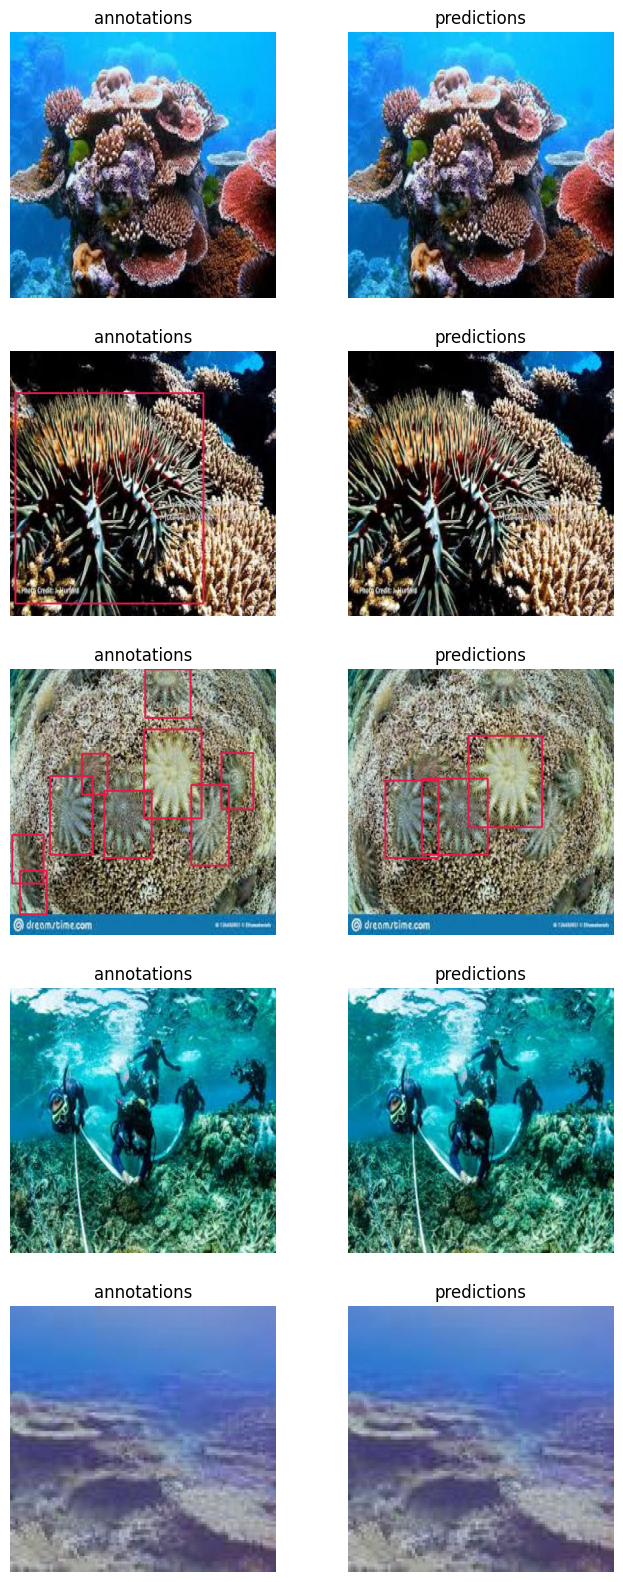

In [20]:
import random
random.seed(10)

import supervision as sv

MAX_IMAGE_COUNT = 5

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n)

box_annotator = sv.BoxAnnotator()

images = []
titles = []

for key in keys:
    frame_with_annotations = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=ds.annotations[key],
        skip_label=True
    )
    images.append(frame_with_annotations)
    titles.append('annotations')
    frame_with_predictions = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=predictions[key],
        skip_label=True
    )
    images.append(frame_with_predictions)
    titles.append('predictions')

%matplotlib inline
sv.plot_images_grid(images=images, titles=titles, grid_size=(n, 2), size=(2 * 4, n * 4))

### Confusion matrix

In [21]:
!pip install onemetric

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.4/49.4 kB 3.5 MB/s eta 0:00:00


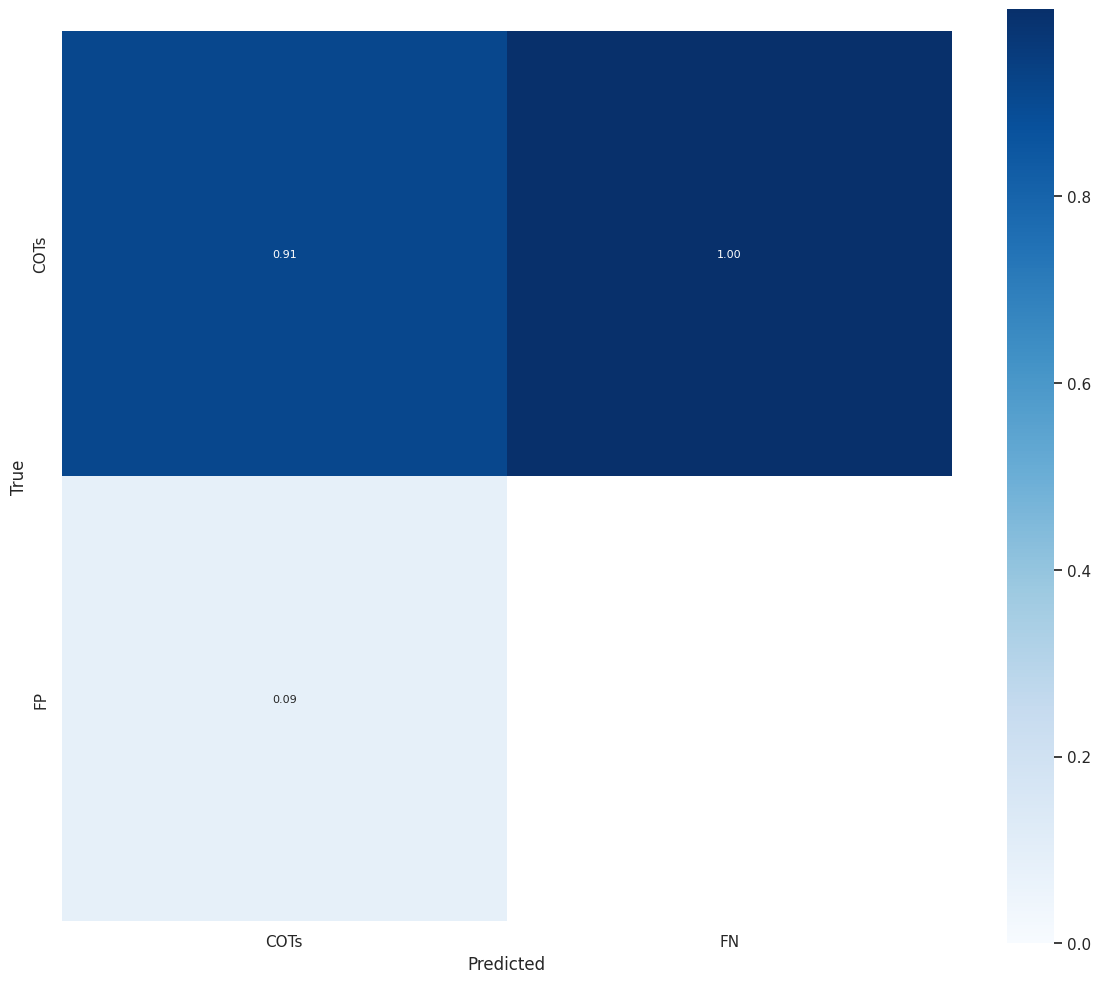

In [22]:
import os

import numpy as np

from onemetric.cv.object_detection import ConfusionMatrix

keys = list(ds.images.keys())

annotation_batches, prediction_batches = [], []

for key in keys:
    annotation=ds.annotations[key]
    annotation_batch = np.column_stack((
        annotation.xyxy,
        annotation.class_id
    ))
    annotation_batches.append(annotation_batch)

    prediction=predictions[key]
    prediction_batch = np.column_stack((
        prediction.xyxy,
        prediction.class_id,
        prediction.confidence
    ))
    prediction_batches.append(prediction_batch)

confusion_matrix = ConfusionMatrix.from_detections(
    true_batches=annotation_batches,
    detection_batches=prediction_batches,
    num_classes=len(ds.classes),
    conf_threshold=CONFIDENCE_TRESHOLD
)

confusion_matrix.plot(os.path.join(HOME, "confusion_matrix.png"), class_names=ds.classes)